<a href="https://colab.research.google.com/github/Kimsumin1234/textmining/blob/main/01_KLUE_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC_%ED%86%B5%ED%95%9C_%EB%AC%B8%EC%9E%90%EC%97%B4_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install koreanize_matplotlib
!apt -qq -y install fonts-nanum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 16.8 MB/s eta 0:00:00
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

### <a href="https://klue-benchmark.com/">KLUE</a>
- 연구용 데이터 셋


In [3]:
# read_json 으로 url 불러오기
url = "https://raw.githubusercontent.com/KLUE-benchmark/KLUE/main/klue_benchmark/ynat-v1.1/ynat-v1.1_train.json"

df = pd.read_json(url)
df.head(2)


,guid,title,predefined_news_category,label,annotations,url,date
0,ynat-v1_train_00000,유튜브 내달 2일까지 크리에이터 지원 공간 운영,IT과학,생활문화,"{'annotators': ['08', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.06.30. 오전 10:36
1,ynat-v1_train_00001,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화,생활문화,"{'annotators': ['14', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.08. 오전 5:25


In [4]:
# 행,열 파악

df.shape

(45678, 7)

In [5]:
# 중복 데이터가 있는지 확인

# annotations 쪽에 dict 구조 데이터가 들어있어서 unhashable type: 'dict' 에러가 난다
# df.duplicated()

# subset= 으로 기준을 줘야한다
df.duplicated(subset=['title'])

0        False
1        False
2        False
3        False
4        False
         ...  
45673    False
45674    False
45675    False
45676    False
45677    False
Length: 45678, dtype: bool

In [6]:
# 결측치 확인

df.isnull().sum()

guid                        0
title                       0
predefined_news_category    0
label                       0
annotations                 0
url                         0
date                        0
dtype: int64

### 텍스트 길이 분석

In [7]:
# 타이틀 길이를 구해서 새로운 컬럼(title_len) 생성

df['title_len'] = df['title'].str.len().copy()

In [8]:
# 토큰 개수(공백 기준으로) : title_token_count

df['title_token_count'] = df['title'].str.split(' ').str.len().copy()

In [9]:
df.head(2)

,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_token_count
0,ynat-v1_train_00000,유튜브 내달 2일까지 크리에이터 지원 공간 운영,IT과학,생활문화,"{'annotators': ['08', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.06.30. 오전 10:36,26,7
1,ynat-v1_train_00001,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화,생활문화,"{'annotators': ['14', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.08. 오전 5:25,23,5


In [10]:
# 타이틀 길이와 토근 개수 컬럼만으로 기술통계 요약 정보 보기

df[['title_len','title_token_count']].describe()

,title_len,title_token_count
count,45678.000000,45678.000000
mean,27.366544,6.611213
std,4.864236,1.460011
min,4.000000,1.000000
25%,25.000000,6.000000
50%,28.000000,7.000000
75%,31.000000,8.000000
max,44.000000,13.000000


In [11]:
# 텍스트 길이가 가장 짧은 기사는?

df[df['title_len'] == df['title_len'].min()]

,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_token_count
4343,ynat-v1_train_04343,봄 산책,생활문화,생활문화,"{'annotators': ['12', '10', '13'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.04.05. 오후 1:51,4,2


### 히스토그램 차트
- 어떤값 들이 많이 들어있는가 분포를 알수있다

array([[<Axes: title={'center': 'title_len'}>,
        <Axes: title={'center': 'title_token_count'}>]], dtype=object)

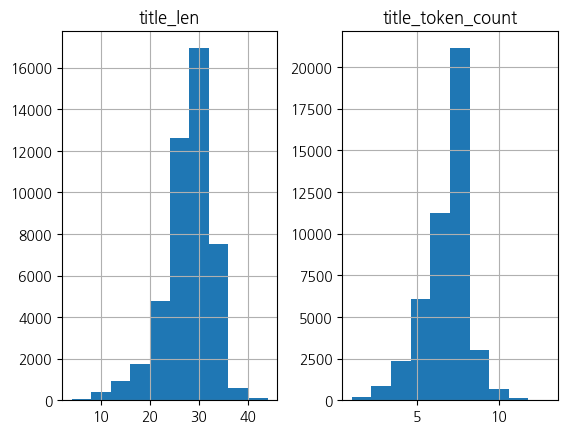

In [12]:
# 히스토그램

# df.plot.hist()

df.hist()

In [13]:
# 텍스트 길이가 가장 긴 기사는?

df[df['title_len'] == df['title_len'].max()]

,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_token_count
5792,ynat-v1_train_05792,美기준금리 0.25%p 인상→0.50%∼0.75%…내년 3차례 인상 시사종합2보,세계,세계,"{'annotators': ['02', '18', '03'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.12.15. 오전 5:10,44,6
20168,ynat-v1_train_20168,그래픽 네이처 세계 연구기관 2017년 평가 발표…서울대 국내 1위·세계 70위,IT과학,사회,"{'annotators': ['12', '07', '14'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2017.09.14. 오후 2:43,44,10
28257,ynat-v1_train_28257,주말 N 여행 영남권 겨울바다 낭만…부산 갈맷길 1∼3코스 89.2㎞ 절경 즐비,생활문화,생활문화,"{'annotators': ['14', '07', '15'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.12.09. 오전 11:00,44,11
30493,ynat-v1_train_30493,MWC 2018 갤S9 64GB 출고가 95만7천원…자급제 포함 28일 예약판매,IT과학,IT과학,"{'annotators': ['13', '10', '08'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.02.26. 오전 11:00,44,9


### 워드 클라우드 시각화
- https://github.com/amueller/word_cloud

  


In [14]:
# 시리즈 형태로 되어 있는 건  안됨

news_title = " ".join(df['title'])

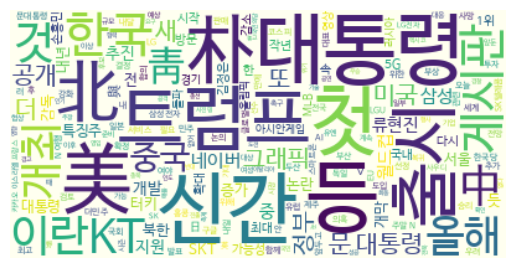

In [15]:
from wordcloud import WordCloud

font_path = r'/Library/Fonts/NanumBarunGothic.ttf'

wordcloud = WordCloud(font_path, background_color='ivory', random_state=42).generate(news_title)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

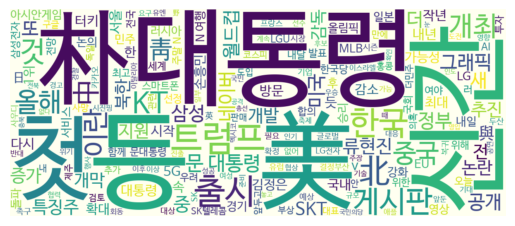

In [16]:
# 워드 클라우드 작성 함수

font_path = r'/Library/Fonts/NanumBarunGothic.ttf'

def display_word_cloud(data, width=1200, height=500):
  wordcloud = WordCloud(font_path, background_color='ivory', random_state=42, width=width, height=height).generate(data)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

display_word_cloud(news_title)

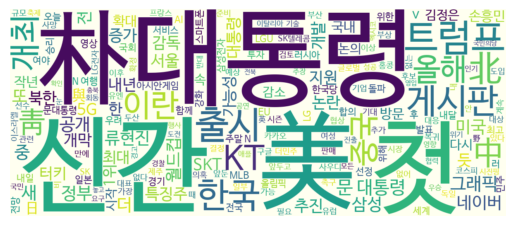

In [17]:
# 불용어 처리까지 들어간 워드 클라우드 함수

font_path = r'/Library/Fonts/NanumBarunGothic.ttf'
stop_words = ['하지만','그리고','그런데','저는','제가','그럼','이런','저런','합니다','많은','많이','정말','너무','수','등','것']

def display_word_cloud(data, width=1200, height=500):
  wordcloud = WordCloud(font_path, stopwords=stop_words, background_color='ivory', random_state=42, width=width, height=height).generate(data)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

display_word_cloud(news_title)

### 레이블

In [18]:
# 레이블에 있는 유니크한 값들 확인

df['label'].unique()

array(['생활문화', '사회', 'IT과학', '스포츠', '세계', '정치', '경제'], dtype=object)

In [19]:
# 레이블 별 개수 파악

df['label'].value_counts()

label
세계      8320
스포츠     7742
정치      7379
경제      6118
생활문화    5751
IT과학    5235
사회      5133
Name: count, dtype: int64

In [20]:
# 세계 기사만 가져오기

# df_world = df[df['label'] == '세계']
subject_title = " ".join(df.loc[df['label'] == '세계','title'])

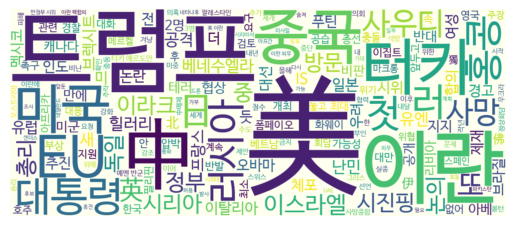

In [21]:
# 세계 기사로 워드 클라우드 만들기

# world_title = " ".join(df_world['title'])
# display_word_cloud(world_title)
display_word_cloud(subject_title)

### [실습] 생활문화 레이블 가져와서 워드 클라우드 작성하기

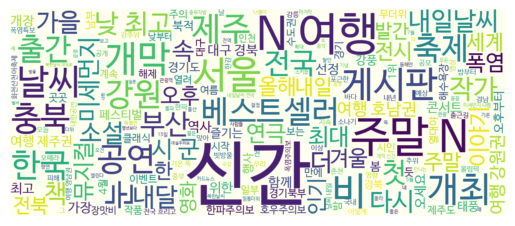

In [22]:
subject_title = " ".join(df.loc[df['label'] == '생활문화','title'])
display_word_cloud(subject_title)

### 정규식 적용
- 숫자 제거
- 문자만 남기기

In [23]:
df['title']

0              유튜브 내달 2일까지 크리에이터 지원 공간 운영
1                 어버이날 맑다가 흐려져…남부지방 옅은 황사
2             내년부터 국가RD 평가 때 논문건수는 반영 않는다
3         김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4          회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간
                       ...               
45673        사우디 아람코 주요 석유시설·유전 드론 공격에 화재
45674      박기원 감독 눈치 보지 말고…비예나 눈치 본 건 아닌데
45675    아시안게임 첫 경기 앞둔 라건아 인도네시아 팬이라도 ...
45676       트럼프 미중 무역협상 1단계 합의 서명식 가질 것종합
45677    극적 역전승 도로공사 GS칼텍스 꺾고 2년 연속 챔프...
Name: title, Length: 45678, dtype: object

In [24]:
# 숫자제거

# df['title'].str.replace('[0-9]','',regex=True)
df['title2'] = df['title'].str.replace(r'\d','',regex=True)

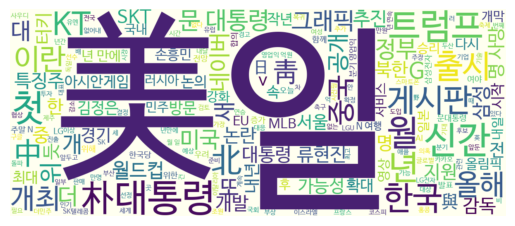

In [25]:
# 워드 클라우드 그리기

subject_title = " ".join(df['title2'])
display_word_cloud(subject_title)

In [26]:
# 한자 제거 : 한글, 영어, 공백 남기기
# 한글 : 가-힣, ㄱ-ㅎ, ㅏ-ㅣ
# 영어 : a-z, A-Z
# 공백 :

df['title3'] = df['title'].str.replace('[^ㅏ-ㅣ가-힣ㄱ-ㅎa-zA-Z ]','',regex=True)

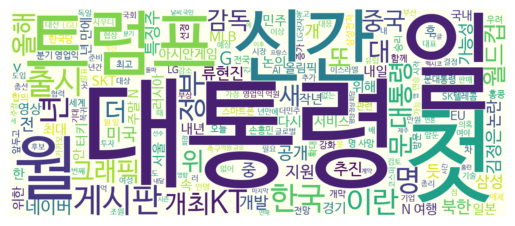

In [27]:
# 워드 클라우드 그리기

subject_title = " ".join(df['title3'])
display_word_cloud(subject_title)

## 형태소 분석기로 특정 품사만 추출하기

### Pecab
- 일본어 형태소 분석기 Mecab 를 한국어 형태소 분석기로 작성
- https://github.com/hyunwoongko/pecab
- 옛날에는 Mecab 을 많이 사용했는데 사용하기가 불편하다, 형태소 분석기가 다른언어로 만들어져 있다 파이썬으로 안만들어져 있음
- Mecab 을 파이썬으로 만든게 Pecab 이다
- 형태소 분석기가 여러개가 있는데 그중에 하나가 Mecab 이 있고 이게 불편해서 Pecab 을 만들었다

In [28]:
!pip install pecab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 45.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 17.8 MB/s eta 0:00:00
  Created wheel for pecab: filename=pecab-1.0.8-py3-none-any.whl size=26646664 sha256=142579ff72c48a0e25400a5cc9d1d67326eed5a45f09ccd2156c81ccc842e570
  Stored in directory: /root/.cache/pip/wheels/5c/6f/b4/ab61b8863d7d8b1409def8ae31adcaa089fa91b8d022ec309d
Successfully built pecab


In [29]:
from pecab import PeCab

pecab = PeCab()

In [30]:
# morphs() : 텍스트 분리

# ['아버지', '가', '방', '에', '들어가', '시', '다']
pecab.morphs("아버지가방에들어가시다")
# ['아버지', '가', '방', '에', '들어가', '시', '다']
pecab.morphs("아버지가 방에 들어가시다")

['아버지', '가', '방', '에', '들어가', '시', '다']

In [31]:
# nouns() : 명사,대명사 추출

# ['아버지', '방']
pecab.nouns("아버지가 방에 들어가시다")
# ['자장면', '짬뽕', '그것', '고민']
pecab.nouns("자장면을 먹을까? 짬뽕을 먹을까? 그것이 고민이로다.")

['자장면', '짬뽕', '그것', '고민']

- pos() : 형태소 분석

In [32]:
# pos() : 품사 추출

pecab.pos("자장면을 먹을까? 짬뽕을 먹을까? 그것이 고민이로다.")

[('자장면', 'NNG'),
 ('을', 'JKO'),
 ('먹', 'VV'),
 ('을까', 'EF'),
 ('?', 'SF'),
 ('짬뽕', 'NNG'),
 ('을', 'JKO'),
 ('먹', 'VV'),
 ('을까', 'EF'),
 ('?', 'SF'),
 ('그것', 'NP'),
 ('이', 'JKS'),
 ('고민', 'NNG'),
 ('이', 'VCP'),
 ('로다', 'EF'),
 ('.', 'SF')]

In [33]:
# df['title] 명사 추출
# 영어, 숫자는 안해주고 한글만 명사 추출 해준다

pecab.nouns(df.loc[30493,'title'])

['갤', '출고가', '만', '천', '원', '자급', '포함', '일', '예약', '판매']

In [34]:
# 사회 레이블 title 명사 추출

df_nouns = df.loc[df['label'] == '사회'].sample(2000,random_state=42).copy()

In [35]:
# 시간 진행 상황
from tqdm import tqdm

tqdm.pandas()

# ' '.join(pecab.nouns(x)) : join 을 안하면 리스트 형태로 나오기 때문에 join 을 해준다
df_nouns['title_nouns'] = df_nouns['title'].progress_map(lambda x:' '.join(pecab.nouns(x)))

100%|██████████| 2000/2000 [00:52<00:00, 38.31it/s]


In [36]:
df_nouns['title_nouns'].head()

45317          국가 재원 나라 배움터 러닝 올해 학습 서비스 시작
17300    장석 점거 몸싸움 욕설 동물 국회 재연 아수라장 국회 종합 보
20660                       양제츠 자리 안내 정의 실장
6542              건강 기능 식품 광고 사전 심의 사전 검열 위
11095                  거래소 안랩 성실 공시 법인 미 지정
Name: title_nouns, dtype: object

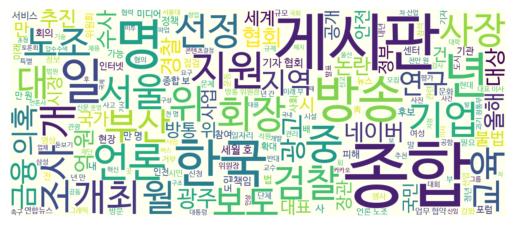

In [37]:
display_word_cloud(' '.join(df_nouns['title_nouns']))

## 워드 클라우드 마스크 처리
- https://github.com/amueller/word_cloud/blob/main/examples/masked.py
- 직사각형 모양 을 마스크 처리 해서 원하는 모양으로 나오게 할수있다

In [38]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [39]:
from urllib import request
# 마스크 이미지 다운로드

import requests
from PIL import Image

mask_img_path = "https://raw.githubusercontent.com/amueller/word_cloud/main/examples/alice_mask.png"

# 이미지를 내 구글 드라이브에 다운로드 한다
res = requests.get(mask_img_path)
if res.status_code == 200:
  # 파일저장
  # 'wb' : write byte 형태 (그림파일 이기 때문에)
  with open('/content/gdrive/MyDrive/Colab Notebooks/텍스트마이닝/data/alice_mask.png','wb') as file:
    file.write(res.content)

In [40]:
# 보여줄 이미지 변수로 지정

mask_img = np.array(Image.open('/content/gdrive/MyDrive/Colab Notebooks/텍스트마이닝/data/alice_mask.png'))

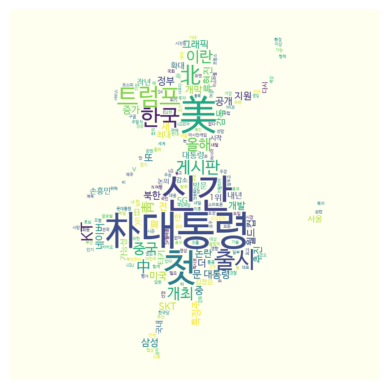

In [41]:
# 마스크 이미지 추가 워드 클라우드 함수

font_path = r'/Library/Fonts/NanumBarunGothic.ttf'

def display_word_cloud(data, width=1200, height=500, mask=mask_img, stopwords=stop_words):
  wordcloud = WordCloud(font_path, stopwords=stopwords, mask=mask, background_color='ivory', random_state=42, width=width, height=height).generate(data)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


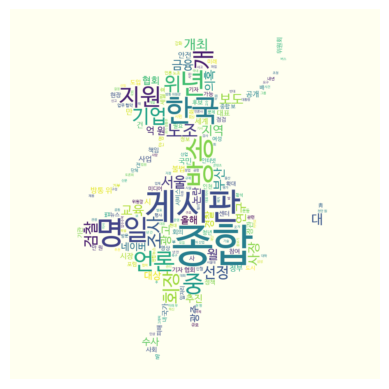

In [42]:
# 기본은 엘리스 모양

display_word_cloud(' '.join(df_nouns['title_nouns']))

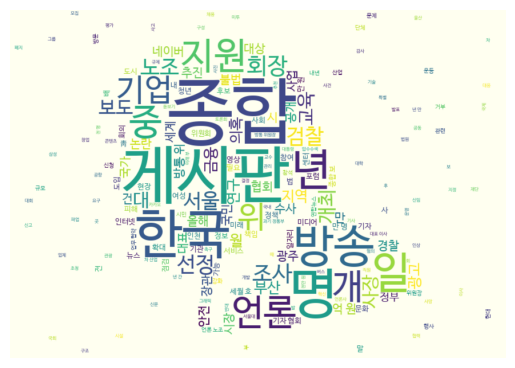

In [44]:
# 트럼프 마스크

mask_img = np.array(Image.open('/content/gdrive/MyDrive/Colab Notebooks/텍스트마이닝/data/trump.png'))

display_word_cloud(' '.join(df_nouns['title_nouns']),mask=mask_img)

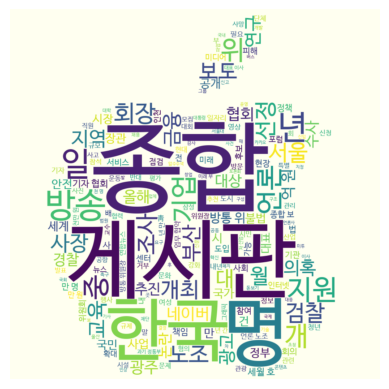

In [45]:
# 애플 마스크

mask_img = np.array(Image.open('/content/gdrive/MyDrive/Colab Notebooks/텍스트마이닝/data/apple_mask_img.png'))

display_word_cloud(' '.join(df_nouns['title_nouns']),mask=mask_img)

In [46]:
# 직접 마스크 이미지 다운로드 받아서 해보기
# https://spencerschien.info/post/data_viz_how_to/dense_word_clouds/logo.png

mask_img_path = "https://spencerschien.info/post/data_viz_how_to/dense_word_clouds/logo.png"

# 이미지를 내 구글 드라이브에 다운로드 한다
res = requests.get(mask_img_path)
if res.status_code == 200:
  # 파일저장
  # 'wb' : write byte 형태 (그림파일 이기 때문에)
  with open('/content/gdrive/MyDrive/Colab Notebooks/텍스트마이닝/data/heart_mask.png','wb') as file:
    file.write(res.content)

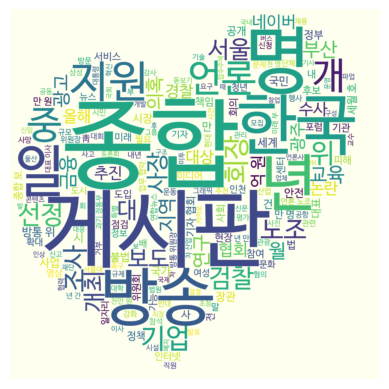

In [47]:
# 직접 마스크 이미지 다운받은거로 워드클라우드 만들어보기

mask_img = np.array(Image.open('/content/gdrive/MyDrive/Colab Notebooks/텍스트마이닝/data/heart_mask.png'))

display_word_cloud(' '.join(df_nouns['title_nouns']),mask=mask_img)